# Classification Predict Student Solution

© Explore Data Science Academy


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#one>2. Problem Statement</a>

<a href=#one>3. Importing Packages</a>

<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis (EDA)</a>

<a href=#four>6. Data Engineering</a>

<a href=#five>7. Modeling</a>

<a href=#six>8. Model Performance</a>

<a href=#seven>9. Model Explanations</a>

<a href=#one>10. Conclusion</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Introduction ⚡ |
| :--------------------------- |
| In this section you are required to give an overview of the project as given in the competion. |

 <a id="one"></a>
## 2. Problem statement
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Problem statement ⚡ |
| :--------------------------- |
| In this section you are required to would like to determine how people perceive climate change and whether or not they believe it is a real threat. |

---

<a id="two"></a>
## 3. Import packages and libaries to use in the project
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: package importation⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [79]:
# data analysis and wrangling libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesssing
import re
import string
from wordcloud import WordCloud
import pickle

#stopwords
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from collections import defaultdict
from nltk.stem import WordNetLemmatizer


# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# model evaluation 
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report


<a id="three"></a>
## 4. Loading of Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: data loading ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [80]:
# Read training data from CSV file into a Dataframe
df_train = pd.read_csv(r"C:\Users\Tune_bdx\Downloads\train_set.csv\train_set.csv")
# Read test data from CSV file into a Dataframe
df_test = pd.read_csv(r"C:\Users\Tune_bdx\Downloads\train_set.csv\test_set.csv")

In [81]:
#View train dataset
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [82]:
#View test dataset
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


I observed our train and test dataframe by using df.head() function. The df.head() function displays the first five rows of the dataframe by default.
By observation the train dataframe has two variables:

- `Language ID - Language unique ID
- `Text: Language text

While the test dataframe has two variables

- `Index`: Language Index number
- `Text`: Language text

The train data will be used to train the model and the test data will be used to test the accuracy of the model in predicting unseen data

In [83]:
df_train.shape

(33000, 2)

In [84]:
df_test.shape

(5682, 2)

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [87]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [88]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

The observation indicates that there are no null value in the dataset

In [89]:
# Group by 'text' and count occurrences
text_counts = df_train.groupby('text').size().reset_index(name='count')

# Sort by 'count' in descending order
text_counts_sorted = text_counts.sort_values(by='count', ascending=False)

# Display the result
text_counts_sorted

,text,count
19908,ngokwesekhtjheni yomthetho ophathelene nalokhu...,17
26235,ukubhalelwa kuzalisa iimfuneko zomthetho ophat...,14
9530,imali osalele ngayo emva nayo seyifakiwe emrho...,13
13004,ku ya hi xiyenge xa xa nawu u ni mfanelo yo ko...,10
22769,sibawa abafakazeli ababili esingakghona ukubat...,10
...,...,...
10307,inhloso yalelibhukwana ukwenza amalunga omphak...,1
10306,inhloso yale ngqungquthela wukuqeda ukusetshen...,1
10305,inhloso ukuqiniseka ukuthi umasipala unamaling...,1
10304,inhloso ukuqikelela ukuthi umbono kamasipala n...,1


In [90]:
# Group by 'Lang ID' and count occurrences
lang_id_counts = df_train.groupby('lang_id').size().reset_index(name='count')

# Sort by 'count' in descending order
lang_id_counts_sorted = lang_id_counts.sort_values(by='count', ascending=False)

# Display the result
lang_id_counts_sorted

,lang_id,count
0,afr,3000
1,eng,3000
2,nbl,3000
3,nso,3000
4,sot,3000
5,ssw,3000
6,tsn,3000
7,tso,3000
8,ven,3000
9,xho,3000


The languages are quite shared across evenly. Indicating no form of imbalance. 

Finally, let's check for any prevalent duplicates in the data where both the text and Lang ID are identical, ensuring they belong to the same category.

In [91]:
# Identify and extract rows with duplicated 'message' and 'sentiment' values
duplicates = df_train[df_train[['text', 'lang_id']].duplicated(keep=False)].count()

# Display the DataFrame containing duplicate rows
duplicates['text']

5599

5599 rows contains duplicates with the same `text` and the same `lang_id`.

In [92]:
# Count the occurrences of each duplicate text
text_counts = df_train['text'].value_counts()

# Display the result
text_counts.head(10)

ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le                                               17
ukubhalelwa kuzalisa iimfuneko zomthetho ophathelene nalokhu kungawufelelisa umrholwakho naweqisa iinyanga ezintathu ngokulandelana ungawuthathi umrholwakho nakhona uzakufelela umrholo owuthole ngokungakafaneli kufuze uwubuyise                                                               14
imali osalele ngayo emva nayo seyifakiwe emrholweni wakho wokuthoma nakungenzeka ukuthi imali le ibe yinengi ukudlula isilinganiso sephrovinsi yangekhenu izakuhlukaniswa ngeenyanga eziimbadlwana malungana nalokhu thintana ne-ofisi yezehlalakuhle yangekhenu nawufuna eminye imininingwana    13
sibawa abafakazeli ababili esingakghona ukubathola umrholi womphakathi kunye nesikghwari esiwufundeleko umsebenzi wobukgh

<a id="three"></a>
## 5. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: EDA process ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |


In [93]:
df_eda = df_train.copy()
# Display the cleaning dataset
df_eda

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


# look at data statistics
Let's visualize the distribution among the Language categories:


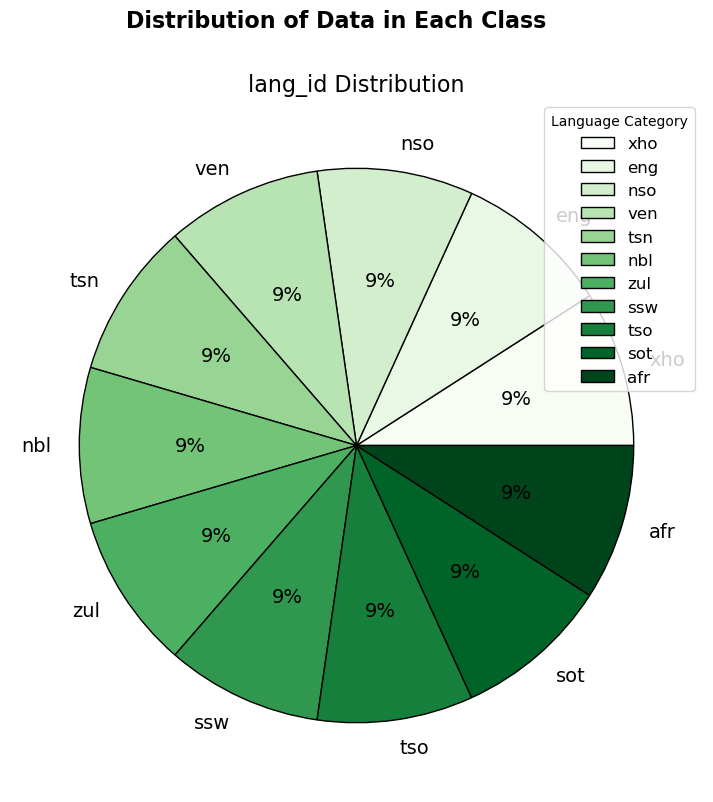

In [ ]:
# plot relevant feature interactions
# Create a pie chart to visualize the distribution of data in each class
fig, axs = plt.subplots(figsize=(16, 9))

# Set title of the pie chart
fig.suptitle("Distribution of Data in Each Class", fontweight='bold', fontsize=16)

# Plot pie chart with increased font size for percentages and legend
df_eda['lang_id'].value_counts().plot(kind='pie', autopct='%1.0f%%', colormap='Greens', wedgeprops=dict(edgecolor='black'), fontsize=14)

# Set additional properties for better readability
plt.title('lang_id Distribution', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.legend(title="Language Category", fontsize=12)

# Show the pie chart
plt.show()

In [ ]:
def is_duplicate(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Split the text into words
        word_list = text.split()
        
        # Check if "duplicates" is present in the word list
        return 1 if "duplicates" in word_list else 0
    else:
        # If 'text' is not a string, it's not a duplicates
        return 0

In [ ]:
# Apply the is_duplicated function to the 'text' column in df_eda
df_eda_duplicate = df_eda['text'].apply(is_duplicate)

# Filter the DataFrame to show only duplicate (is_duplicate = 1) and group by lang_id
duplicate_by_lang_id = df_eda[df_eda['text'] == 1].groupby('lang_id')['text'].count()

# Display the grouped duplicate by lang_id
print(duplicate_by_lang_id)

Series([], Name: text, dtype: int64)


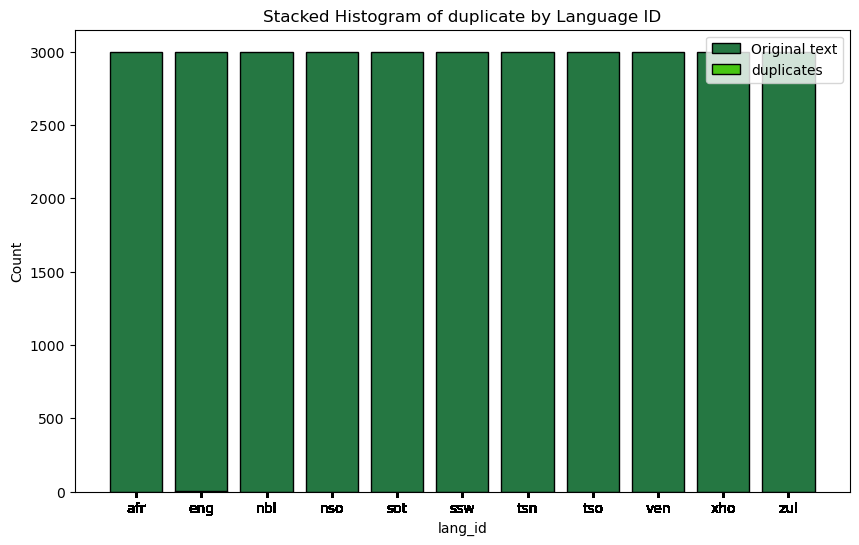

In [ ]:
# Data from the first code
lang_id_counts_sorted = lang_id_counts.sort_values(by='count', ascending=False)

# Data from the second code
duplicate_by_lang_id = df_eda[df_eda_duplicate == 1].groupby('lang_id')['text'].count()

# Create a stacked histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for the first code (Original text) with borders
ax.bar(lang_id_counts_sorted['lang_id'], lang_id_counts_sorted['count'], color='#257742', edgecolor='black', label='Original text')

# Bar chart for the second code (duplicate) with borders
ax.bar(duplicate_by_lang_id.index, duplicate_by_lang_id.values, color='#47C612', edgecolor='black', label='duplicates')

# Customize the plot
ax.set_title('Stacked Histogram of duplicate by Language ID')
ax.set_xlabel('lang_id')
ax.set_ylabel('Count')
ax.legend()

# Show only whole numbers on the x-axis
plt.xticks(df_eda['lang_id']), df_eda['lang_id']

# Show the stacked histogram
plt.show()

In [ ]:
# Convert all text in the 'message' column to lowercase
df_eda['text'] = df_eda['text'].str.lower()

# Display the updated DataFrame
df_eda.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [ ]:
# Create a cleaning dataset by copying the 'df_train' DataFrame
df_clean = df_train.copy()

# Display the cleaning dataset
df_clean

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [ ]:
# Create a cleaning dataset by copying the 'df_test' DataFrame
df_test_clean = df_test.copy()

# Display the cleaning dataset
df_test_clean

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


In [ ]:
# Convert all text in the 'text' column to lowercase
df_clean['text'] = df_clean['text'].str.lower()

# Display the updated DataFrame
df_clean

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [ ]:
# Convert all text in the 'text' column to lowercase
df_test_clean['text'] = df_clean['text'].str.lower()

# Display the updated DataFrame
df_test_clean

,index,text
0,1,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,2,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,3,the province of kwazulu-natal department of tr...
3,4,o netefatša gore o ba file dilo ka moka tše le...
4,5,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
5677,5678,umthethosisekelo ugunyaza itjhuguluko ebujamen...
5678,5679,dikhampani kapa kgwebo tsa motho ya mong di lo...
5679,5680,dingaka di dumela hore motho ya tsubang dithet...
5680,5681,tumelo yeo e fiwago ka ntle ga afrika borwa e ...


In [ ]:

df_clean["i"] = df_clean["text"].apply(is_duplicate)
df_clean["duplicate_text"] =  df_clean["text"].apply(is_duplicate)
df_clean.head()


,lang_id,text,is_duplicate,duplicate_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,0,0
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,0,0
2,eng,the province of kwazulu-natal department of tr...,0,0
3,nso,o netefatša gore o ba file dilo ka moka tše le...,0,0
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,0,0


In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 6. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more Classifgication  models that are able to accurately predict the believe of people in climate change. |

---

In [ ]:
vectorizer = CountVectorizer()

#variable assignment
X = vectorizer.fit_transform(df_eda['text'])
y = df_eda['lang_id']

In [ ]:
vect_df_test = vectorizer.transform(df_eda['text'])

In [ ]:
#splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#model development and training
lr_model = LogisticRegression( multi_class = 'ovr', solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
#make predictions using the lr_model
lr_pred = lr_model.predict(X_test)

SVM

In [ ]:
#develop and train svc model
svc = SVC(kernel='rbf', gamma='scale', C = 1) 
# train model with train data
svc.fit(X_train, y_train)

SVC(C=1)

In [ ]:
#make prediction using svc_model
pred_svc = svc.predict(X_test)

#### Building SKlearn Pipeline Model

In [ ]:
#Pipeline development procedure:

#variable assignment
x = df_eda['text']
y = df_eda['lang_id']

#splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#developing the pipeline model
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(lowercase=False)),  # Preprocessing step
    ('classifier', MultinomialNB())     # Model
])

#Convert input data to strings
x_train = [str(x) for x in x_train]
y_train = [str(y) for y in y_train]

# Train the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(lowercase=False)),
                ('classifier', MultinomialNB())])

In [ ]:
x_test = [str(x) for x in x_test]
pred_pipeline = pipeline.predict(x_test)#make prediction with the test data

**Model Evaluation**

Linear Regression

In [ ]:
#Model evaluations
accuracy_lr  = accuracy_score(y_test, lr_pred )
f1_lr = f1_score(y_test, lr_pred, average = 'weighted')
precision_lr = precision_score(y_test, lr_pred, average = 'weighted')

print("Accuracy:", accuracy_lr)
print("F1_score:", f1_lr)
print("Precision:", precision_lr)

Accuracy: 0.9943939393939394
F1_score: 0.9943939937925306
Precision: 0.9943960444269021


In [ ]:
# creating a dataframe of the confusion matrix 
df_confusion_lr_model = pd.DataFrame(confusion_matrix(y_test,lr_pred))
#visualing the confusion dataframe
df_confusion_lr_model

,0,1,2,3,4,5,6,7,8,9,10
0,580,1,0,0,0,2,0,0,0,0,0
1,0,615,0,0,0,0,0,0,0,0,0
2,1,0,577,0,0,0,0,0,0,1,4
3,0,0,0,622,1,0,2,0,0,0,0
4,0,0,0,1,617,0,0,0,0,0,0
5,0,0,0,0,0,581,0,0,0,0,3
6,1,0,0,1,1,0,595,0,0,0,0
7,0,0,0,0,0,0,0,561,0,0,0
8,0,0,0,0,0,0,0,0,634,0,0
9,0,0,1,0,0,0,0,0,0,603,5


In [ ]:
results = classification_report(y_test,lr_pred)
print(results)

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.99      0.99       584
         tsn       1.00      0.99      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [ ]:
#Model evaluations
accuracy_svc  = accuracy_score(y_test, pred_svc)
f1_svc = f1_score(y_test, pred_svc, average = 'weighted')
precision_svc = precision_score(y_test, pred_svc, average = 'weighted')

print("Accuracy:", accuracy_svc)
print("F1_score:", f1_svc)
print("Precision:", precision_svc)

Accuracy: 0.9915151515151515
F1_score: 0.9915204291200247
Precision: 0.9915448909368751


In [ ]:
# creating a dataframe of the confusion matrix 
df_confusion_svm_model = pd.DataFrame(confusion_matrix(y_test,pred_svc))
#visualing the confusion dataframe
df_confusion_svm_model

,0,1,2,3,4,5,6,7,8,9,10
0,577,1,0,0,0,2,0,0,0,3,0
1,0,613,0,0,0,0,0,0,0,2,0
2,1,0,568,0,0,0,0,0,0,3,11
3,0,0,0,621,1,0,2,0,0,1,0
4,0,0,0,0,617,0,0,0,0,0,1
5,0,0,0,0,0,582,0,0,0,0,2
6,1,0,0,2,3,0,591,0,1,0,0
7,0,0,0,0,0,0,0,561,0,0,0
8,0,0,0,0,0,0,0,0,634,0,0
9,0,0,2,0,0,0,0,0,0,603,4


In [ ]:
results = classification_report(y_test,pred_svc)
print(results)

              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.97      0.98       583
         nso       1.00      0.99      1.00       625
         sot       0.99      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.99      0.98       609
         zul       0.97      0.98      0.97       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



#### Pipeline Model

In [ ]:
#Model evaluations
pred_pipeline_numeric = np.array(pred_pipeline, dtype=np) # Convert predicted labels to numeric type

C:\Users\Tune_bdx\AppData\Local\Temp\ipykernel_2664\1962558825.py:2: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  pred_pipeline_numeric = np.array(pred_pipeline, dtype=np) # Convert predicted labels to numeric type


In [ ]:
accuracy_pipeline = accuracy_score(y_test, pred_pipeline_numeric)
f1_pipeline = f1_score(y_test, pred_pipeline_numeric, average = 'weighted')
precision_pipeline = precision_score(y_test,pred_pipeline_numeric , average = 'weighted')

print("Accuracy:", accuracy_pipeline)
print("F1_score:", f1_pipeline)
print("Precision:", precision_pipeline)

Accuracy: 0.9989393939393939
F1_score: 0.9989392771541917
Precision: 0.998941955790228


In [ ]:
# creating a dataframe of the confusion matrix 
df_confusion_pipe_model = pd.DataFrame(confusion_matrix(y_test, pred_pipeline_numeric))
#visualing the confusion dataframe
df_confusion_pipe_model

,0,1,2,3,4,5,6,7,8,9,10
0,583,0,0,0,0,0,0,0,0,0,0
1,0,615,0,0,0,0,0,0,0,0,0
2,0,0,583,0,0,0,0,0,0,0,0
3,0,0,0,624,1,0,0,0,0,0,0
4,0,0,0,0,618,0,0,0,0,0,0
5,0,0,0,0,0,584,0,0,0,0,0
6,1,0,0,0,0,0,597,0,0,0,0
7,0,0,0,0,0,0,0,561,0,0,0
8,0,0,0,0,0,0,0,0,634,0,0
9,0,0,1,0,0,0,0,0,0,607,1


In [ ]:
results = classification_report(y_test, pred_pipeline_numeric)
print(results)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [ ]:
# create targets and features dataset

In [ ]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

In [ ]:
# Fitting the model to our training data subset
log_reg.fit(X_train, y_train)

c:\Users\Tune_bdx\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict values of the testing subset
pred_log_reg = log_reg.predict(X_train)

# Let's produce a classification report of the model as is:
print(classification_report(y_train, pred_log_reg))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      2417
         eng       1.00      1.00      1.00      2385
         nbl       1.00      1.00      1.00      2417
         nso       1.00      1.00      1.00      2375
         sot       1.00      1.00      1.00      2382
         ssw       1.00      1.00      1.00      2416
         tsn       1.00      1.00      1.00      2402
         tso       1.00      1.00      1.00      2439
         ven       1.00      1.00      1.00      2366
         xho       1.00      1.00      1.00      2391
         zul       1.00      1.00      1.00      2410

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400



In [95]:
log_reg_cm = confusion_matrix(y_train, pred_log_reg)
log_reg_f1 = f1_score(y_train, pred_log_reg, average="weighted") 
log_reg_precision = precision_score(y_train, pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_train, pred_log_reg, average="weighted")

log_reg_metrics = {"f1": log_reg_f1,
           "recall": log_reg_recall,
           "precision": log_reg_precision,
           "confusion_matrix": log_reg_cm
           }

In [97]:
# Initiate final model
final_log_reg = LogisticRegression() 

# Train on all available data
final_log_reg.fit(X_train, y_train)

# Generate predictions for the evaluation dataset
log_reg_predictions = final_log_reg.predict(X_test)

c:\Users\Tune_bdx\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

<a id="seven"></a>
## 10. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---